Import Library

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# CNN

In [5]:
img_size = 128
batch_size = 32

In [7]:
Train = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\dani\Documents\pandaBear-CNN\PandasBears\Train', shuffle=True,
    image_size=(img_size, img_size)
)

Test = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\dani\Documents\pandaBear-CNN\PandasBears\Test',
    shuffle=True,
    image_size=(img_size, img_size)
)

Found 500 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [8]:
class_names = Train.class_names
class_names

['Bears', 'Pandas']

In [9]:
Test.class_names

['Bears', 'Pandas']

In [10]:
Train = Train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
Test = Test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),
    tf.keras.layers.Rescaling(1.0/255.0)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [21]:
# Membuat model
model = Sequential()
model.add(resize_and_rescale)       # Preprocessing: resize dan rescale
model.add(data_augmentation)        # Augmentasi data hanya selama training

# Arsitektur CNN
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_size)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lapisan Fully Connected
model.add(Flatten())
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid')) 

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history= model.fit(Train,
         epochs = 10,
         verbose = 1,
         batch_size = batch_size,
         validation_data = Test)

Epoch 1/10


16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5692 - loss: 0.6387 - val_accuracy: 0.9800 - val_loss: 0.1312
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9733 - loss: 0.0915 - val_accuracy: 0.9300 - val_loss: 0.2363
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9007 - loss: 0.3219 - val_accuracy: 0.9000 - val_loss: 0.2122
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9665 - loss: 0.0814 - val_accuracy: 1.0000 - val_loss: 0.0240
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9954 - loss: 0.0380 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9955 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9947 - loss: 0.0131 - val_accuracy: 0.9900 - val_loss: 0.0083
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0022
Epo

In [24]:
loss, accuracy = model.evaluate(Test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 1.0000 - loss: 0.0013
Test accuracy: 100.00%


First image to predict:


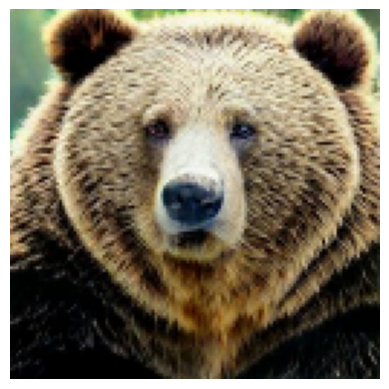

Actual label: Bears
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: Bears


In [25]:
for img_batch, labels_batch in Test.take(1):
    # Ambil gambar pertama dan label dari batch
    first_img = img_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('First image to predict:')
    plt.imshow(first_img)
    plt.axis('off')
    plt.show()

    # Label aktual
    print('Actual label:', class_names[first_label])

    # Prediksi batch pertama
    batch_predictions = model.predict(img_batch)
    
    # Konversi prediksi menjadi kelas berdasarkan threshold 0.5
    predicted_label = 1 if batch_predictions[0] > 0.5 else 0
    print('Predicted label:', class_names[predicted_label])


In [26]:
def predict(model, img):
    # Konversi gambar ke array dan tambahkan dimensi batch
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Lakukan prediksi
    predictions = model.predict(img_array)

    # Prediksi kelas berdasarkan threshold 0.5
    predicted_class = class_names[1] if predictions[0] > 0.5 else class_names[0]
    
    # Hitung confidence sebagai persentase
    confidence = round(100 * predictions[0][0] if predictions[0] > 0.5 else 100 * (1 - predictions[0][0]), 2)
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


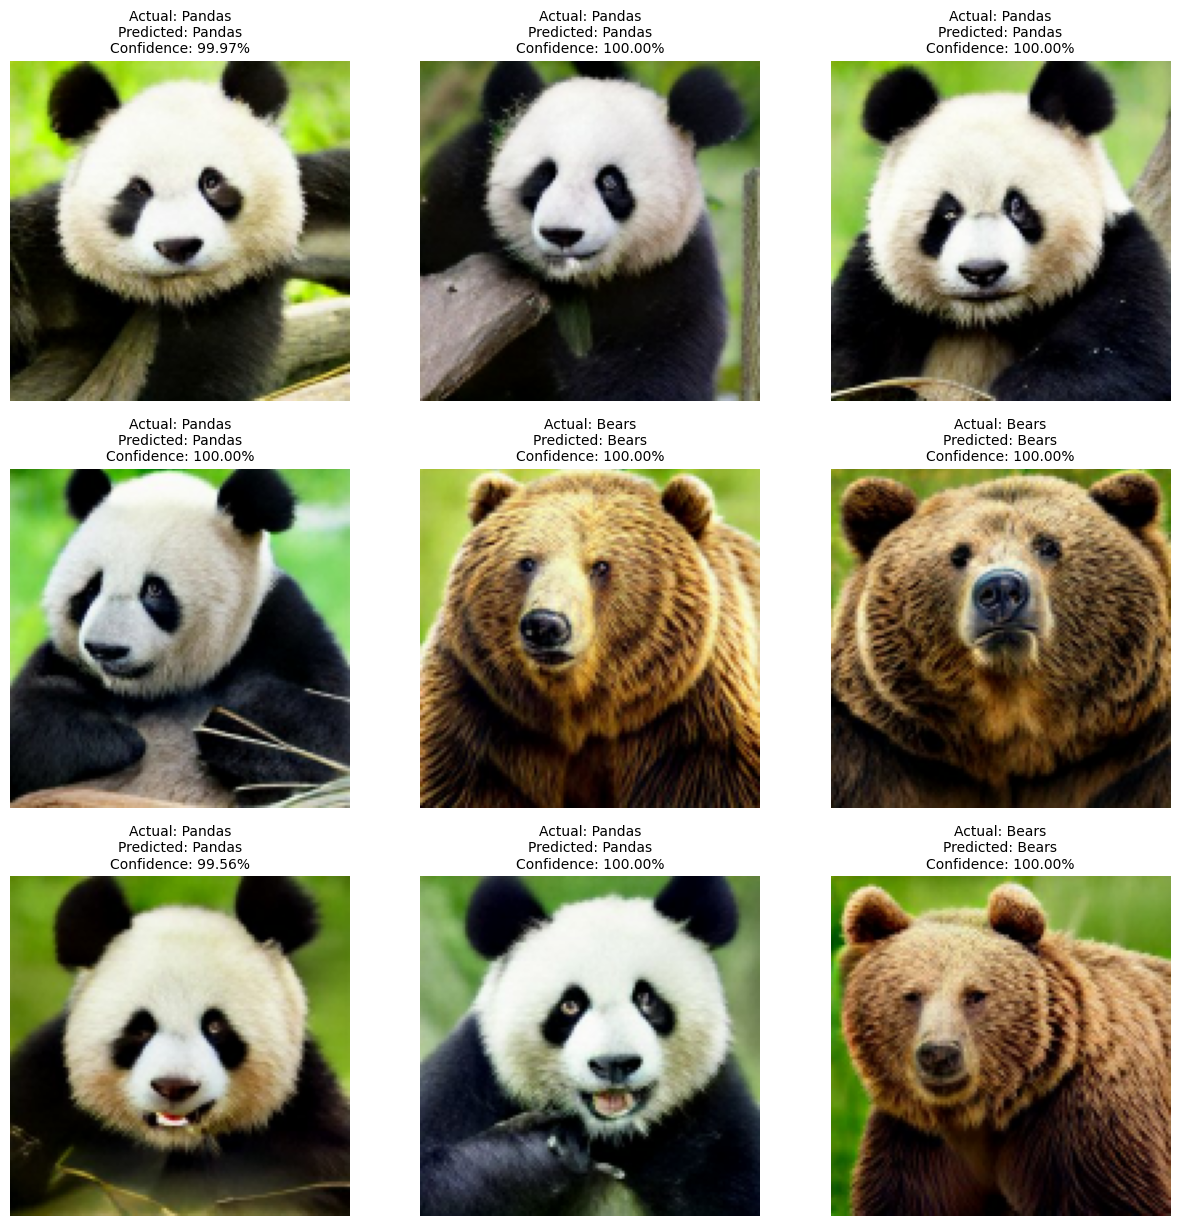

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in Test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')  # Menyembunyikan sumbu

        # Prediksi model
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        # Judul dengan label asli, prediksi, dan confidence
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", 
                  fontsize=10, color='black')
plt.show()


In [33]:
image = '268.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_size, img_size))
image_arr = tf.keras.utils.img_to_array(image)
image_bat = tf.expand_dims(image_arr, 0)

In [34]:
# Lakukan prediksi
predict = model.predict(image_bat)[0][0]  # Dapatkan nilai probabilitas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


In [35]:
# Tentukan kelas berdasarkan threshold 0.5
predicted_class = class_names[1] if predict > 0.5 else class_names[0]
confidence = predict * 100 if predict > 0.5 else (1 - predict) * 100

In [36]:
print(f'Pandas/Bear in image is {predicted_class} with confidence of {confidence:.2f}%')


Pandas/Bear in image is Bears with confidence of 100.00%


In [37]:
model.save('pandaBears.keras')